DATASET FROM http://insideairbnb.com/

In [23]:
# Install the required packages
# TODO: List of pip install commands
# 
# 
# %pip install lois
# %pip install pandas-profiling
# %pip install ipywidgets
# ...

In [24]:
# Import the required packages
# import warnings
# warnings.filterwarnings('ignore')

#Pandas stack
import pandas as pd
import pandas_profiling
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
# Lois
from lois import lois_ds_report

# sklearn
import sklearn

import numpy as np

%matplotlib inline

In [25]:
# Load Paris airbnb data
data = pd.read_csv('../data/ParisAirbnb/ParisAirbnb.csv')

╭─────────────────────────────────────────── Exploratory Data Anlysis ────────────────────────────────────────────╮
│                                                                                                                 │
╰──────────────────────────────────── EDA|simple| Suitable for data scientist ────────────────────────────────────╯

Shape Analysis
┗━━ Dataset Shape Analysis
    ┣━━ Dataset head
    ┣━━ General info 
    ┣━━ The target variable
    ┣━━ Number of rows and columns
    ┣━━ The different data types
    ┃   ┣━━ The sum of different variable type
    ┃   ┗━━ Visual representation of different variable type
    ┗━━ Analyze missing value
        ┣━━ The percentage of missing value in each columns
        ┣━━ The missing value counts
        ┗━━ Visual representation of missing value

╭──────────────────────────────────────────── DATASET SHAPE ANALYSIS ─────────────────────────────────────────────╮
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

-------------------- THE HEAD OF YOUR DATASET --------------------

Your dataset is too large ; only the first 8 columns will be display

                                                    The Dataset                                                    
┏━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┓
┃  id ┃  name ┃  host_id ┃  host_name ┃  neighbourhood_group ┃  neighbourhood ┃  latitude ┃ longitude ┃ room_type ┃
┡━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━┩
└─────┴───────┴──────────┴────────────┴──────────────────────┴────────────────┴───────────┴───────────┴───────────┘

-------------------- SOME GENERAL INFO ABOUT YOUR DATASET --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61365 entries, 0 to 61364
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              61365 non-null  int64  
 1   name                            61324 non-null  object 
 2   host_id                         61365 non-null  int64  
 3   host_name                       61358 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   61365 non-null  object 
 6   latitude                        61365 non-null  float64
 7   longitude                       61365 non-null  float64
 8   room_type                       61365 non-null  object 
 9   price                           61365 non-null  int64  
 10  minimum_nights                  61365 non-null  int64  
 11  number_of_reviews               61365 non-null  int64  
 12  last_review                     

-------------------- THE TARGET VARIABLE OF YOUR DATASET --------------------

╭───────────────────────────────────╮
│ The Target variable is : 'price'  │
╰───────────────────────────────────╯

-------------------- ROWS AND COLUMNS IN YOUR DATASET --------------------

╭─ Shape output ─╮
│ (61365, 18)    │
╰────────────────╯

╭─────────────────────────────────────────────────╮
│ Your dataset contains 61365 Rows and 18 Columns │
╰─────────────────────────────────────────────────╯

-------------------- THE DATA TYPES IN YOUR DATASET --------------------

╭─ Data types output ─╮
│ int64      8        │
│ object     6        │
│ float64    4        │
│ dtype: int64        │
╰─────────────────────╯

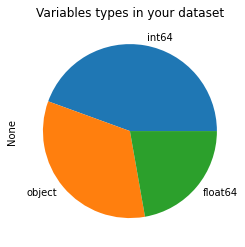

-------------------- MISSING VALUE IN YOUR DATASET --------------------

╭─────────── Missing value output ───────────╮
│ id                                0.000000 │
│ availability_365                  0.000000 │
│ calculated_host_listings_count    0.000000 │
│ number_of_reviews                 0.000000 │
│ minimum_nights                    0.000000 │
│ price                             0.000000 │
│ number_of_reviews_ltm             0.000000 │
│ room_type                         0.000000 │
│ latitude                          0.000000 │
│ neighbourhood                     0.000000 │
│ host_id                           0.000000 │
│ longitude                         0.000000 │
│ host_name                         0.000114 │
│ name                              0.000668 │
│ last_review                       0.193596 │
│ reviews_per_month                 0.193596 │
│ license                           0.398419 │
│ neighbourhood_group               1.000000 │
│ dtype: float64                             │
╰────────────────────────────────────────────╯

╭─ Missing value counts output ─╮
│ 1.000000     1                │
│ 0.000114     1                │
│ 0.000668     1                │
│ 0.398419     1                │
│ 0.193596     2                │
│ 0.000000    12                │
│ dtype: int64                  │
╰───────────────────────────────╯

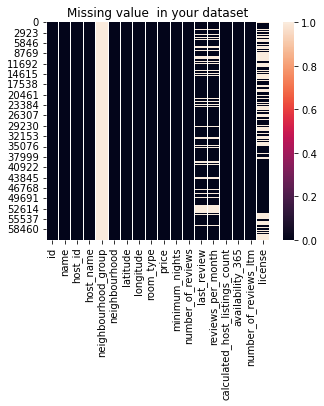

#################### END ####################

In [26]:
# Automate the EDA with lois
lois_ds_report(data, target_variable='price')

In [27]:
# Remove empty column neighbourhood_group
data = data.drop('neighbourhood_group', axis=1)

In [43]:
# Get simple pandas profiling report
data.profile_report()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]


In [29]:
# Check if the same host_id always has the same host_name
count_host_id_name_misses = 0
dic = {}
if 'host_name' in data.columns and 'host_id' in data.columns:
    for host_id, host_name in zip(data.host_id, data.host_name):
        if host_id in dic.keys():
            if dic[host_id] != host_name:
                count_host_id_name_misses += 1
                print('Host id {} has different host name {} and {}.'.format(host_id, dic[host_id], host_name))
        else:
            dic[host_id] = host_name

    print('Number of host_id that has different host_name: {}'.format(count_host_id_name_misses))

# If the ammount of host_id that has different host_name is small,
#  we can drop the host_name column. In this dataset there is only one missmatch.
# This happens because the host does not have a name (null).
#
if 'host_name' in data.columns:
    data = data.drop('host_name', axis=1)

# Remove the id column, since it has 100% unique values.
if 'id' in data.columns:
    data = data.drop('id', axis=1)

#
# Idea: Data mine the field name to get keywords?
#
# For now just remove the field name.
if 'name' in data.columns:
    data = data.drop('name', axis=1)

# 
# Idea: Some hosts have multiple listings, what does that mean?
#       If a host has 50 listings, is that correlated with a higher price?
#
# For now just remove the field host_id.
if 'host_id' in data.columns:
    data = data.drop('host_id', axis=1)

# Get license different values
if 'license' in data.columns:
    print(data.license.unique())
    print('Number of different license values: {}'.format(len(data.license.unique())))


Host id 1721954 has different host name nan and nan.
Number of host_id that has different host_name: 1
['Available with a mobility lease only ("bail mobilité")' '7510900711502'
 '7511500915333' ... '92012-BB-2017-12' '9205000010315' '9205100032915']
Number of different license values: 30789


### TODO:

License : binning? ignore?
longitude/latitude: standardize/normalize
neighborhood: one-hot encoding
room_type: one-hot encoding
minimum_nights: binning by frequency
last_review: binning
number_of_reviews / number_of_reviews_ltm: 
    does the number of reviews matter?
    probably not, but the number of reviews in the last 12 months does
reviews_per_month: binning? a lot of missing values


missing values: 
    - last_review: ?
    - reviews_per_month: fill with 0?
    - license: create bins "no license", "license"
        - differentiate different licenses? or no impact?



In [30]:
# License: 
# Create binary variable if license is present or not
data['license_present'] = data.license.notnull().astype(int)

# Drop license column
data = data.drop('license', axis=1)


In [31]:
# Drop longitude and latitude
data = data.drop(['latitude', 'longitude'], axis=1)

In [32]:
# Get all neighbourhoods and
#neighbourhoods = data.neighbourhood.map(lambda x: x.lower().replace(' ', '')).unique()
#
#maped_neighbourhoods = {}
#id = 0

# Map each neighbourhood to a number
#for neighbourhood in neighbourhoods:
#    if neighbourhood not in maped_neighbourhoods.keys():
#        maped_neighbourhoods[neighbourhood] = id
#        id += 1

# Replace neighbourhood with mapped neighbourhood
#new_neighbourhoods = []
#for i in range(len(data)):
#    unique_neighbourhood = data.neighbourhood[i].lower().replace(' ', '')
#    id = maped_neighbourhoods[unique_neighbourhood]
#    new_neighbourhoods[i] = id

# Add new neighbourhood column to data
# data = data.assign(new_neighbourhood=new_neighbourhoods)

# Drop neighbourhood column
data = data.drop('neighbourhood', axis=1)

In [33]:
# For now just drop room_type
# Later encode the value
data = data.drop('room_type', axis=1)


In [34]:
# For now just drop last_review
# Later encode the value/bin
data = data.drop('last_review', axis=1)

In [35]:
# Remove all the rows with missing values
data = data.dropna()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49485 entries, 0 to 61364
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           49485 non-null  int64  
 1   minimum_nights                  49485 non-null  int64  
 2   number_of_reviews               49485 non-null  int64  
 3   reviews_per_month               49485 non-null  float64
 4   calculated_host_listings_count  49485 non-null  int64  
 5   availability_365                49485 non-null  int64  
 6   number_of_reviews_ltm           49485 non-null  int64  
 7   license_present                 49485 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.4 MB


## Model
### Linear Regression

In [37]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [39]:
print(lm.intercept_)
coeff_data = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_data

92.83707960710521


Coefficient
minimum_nights                    -0.034567
number_of_reviews                 -0.120726
reviews_per_month                 -6.322596
calculated_host_listings_count     1.089329
availability_365                   0.288295
number_of_reviews_ltm              0.586253
license_present                   41.699667

Interpretation of coefficients:
* Holding all other features fixed, a 1 unit increase in minimum_nights is associated with an increase of -0.03 in price.
* Holding all other features fixed, a 1 unit increase in number_of_reviews is associated with an increase of -0.12 in price.
* Holding all other features fixed, a 1 unit increase in reviews_per_month is associated with an increase of -6.32 in price.

...

In [40]:
from sklearn import metrics
predictions = lm.predict(X_test)
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


MAE: 87.94047215127999
MSE: 49154.85892623965
RMSE: 221.7089509384762


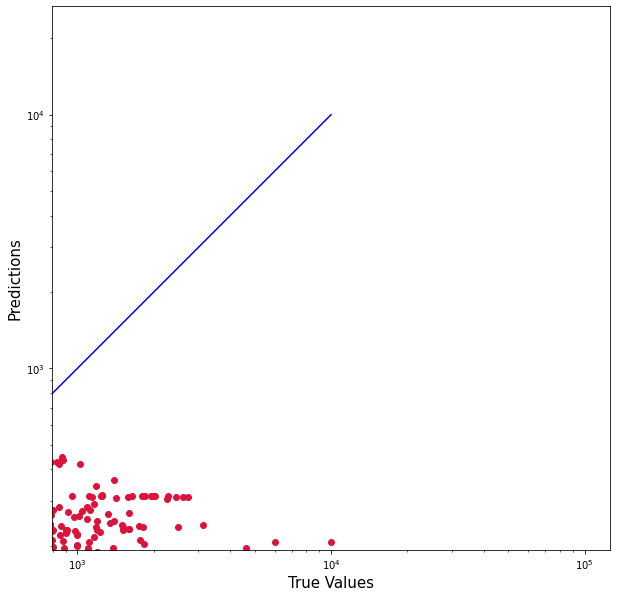

In [41]:
# plot predictions vs actual
plt.figure(figsize=(10,10))
plt.scatter(Y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(Y_test))
p2 = min(min(predictions), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()